<a href="https://colab.research.google.com/github/meerilahi/algoTrading/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib statsmodels yfinance

In [10]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [38]:
stock_symbol = "SPY"
data = yf.download(stock_symbol, start="2020-01-01", end="2024-01-01")

[*********************100%***********************]  1 of 1 completed


In [56]:
df['Close'][:"2023-12-25"]

Ticker,SPY
Date,
2020-01-02,301.194855
2020-01-03,298.914246
2020-01-06,300.054565
2020-01-07,299.210938
2020-01-08,300.805573
...,...
2023-12-18,465.992584
2023-12-19,468.826202
2023-12-20,462.329590


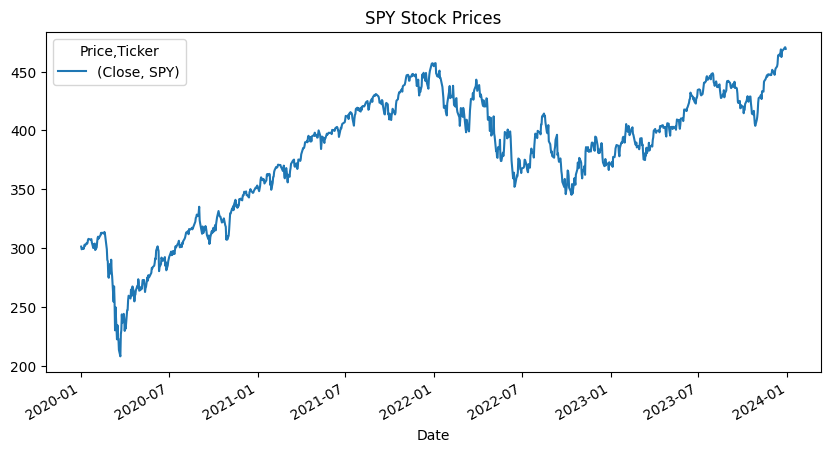

In [40]:
df = data[['Close']]
df.plot(figsize=(10, 5), title=f"{stock_symbol} Stock Prices")
plt.show()

<ipython-input-41-ffa7d3a58973>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close_diff'] = df['Close'].diff(2).dropna()


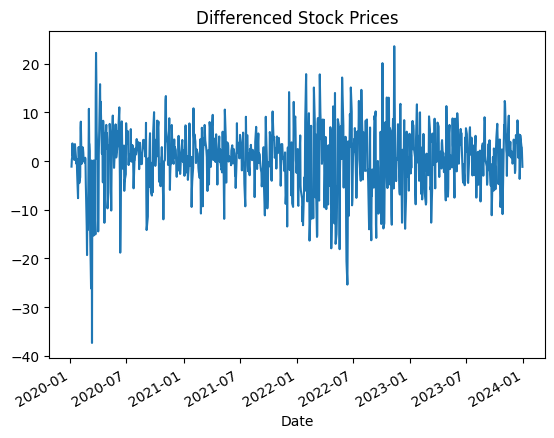

In [41]:
df['Close_diff'] = df['Close'].diff(2).dropna()
df['Close_diff'].dropna().plot(title="Differenced Stock Prices")
plt.show()


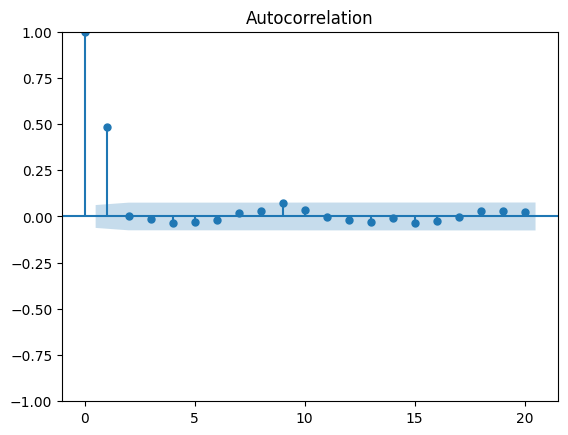

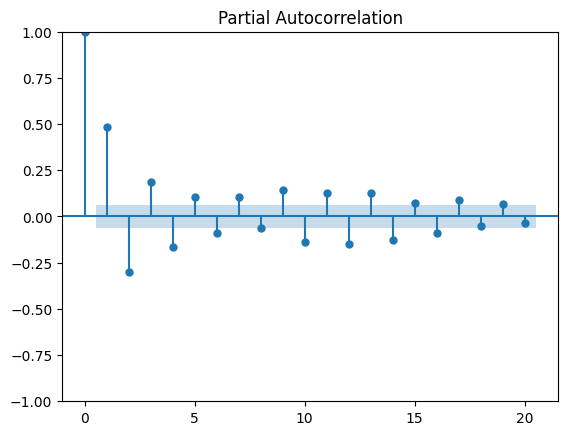

In [42]:
plot_acf(df['Close_diff'].dropna(), lags=20)
plot_pacf(df['Close_diff'].dropna(), lags=20)
plt.show()

In [72]:
model = ARIMA(df['Close'][:"2023-12-25"], order=(3, 2, 2))
model_fit = model.fit()

print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                               SARIMAX Results                                
Dep. Variable:                    SPY   No. Observations:                 1002
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -2956.342
Date:                Fri, 07 Mar 2025   AIC                           5924.683
Time:                        01:24:59   BIC                           5954.130
Sample:                             0   HQIC                          5935.875
                               - 1002                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9852      0.041    -23.788      0.000      -1.066      -0.904
ar.L2         -0.0202      0.033     -0.618      0.537      -0.084       0.044
ar.L3          0.1047      0.023      4.652      0.0

In [70]:
forecast_steps = 4
forecast = model_fit.forecast(steps=forecast_steps)
future_dates = pd.date_range(start=pd.to_datetime("2023-12-26"), periods=forecast_steps, freq='B')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


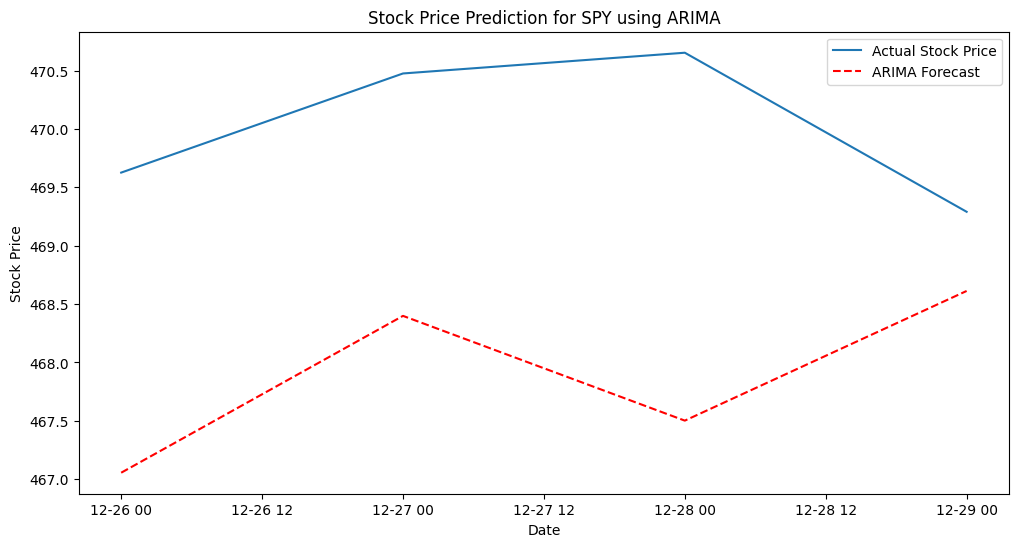

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close']["2023-12-25":], label="Actual Stock Price")
plt.plot(future_dates, forecast, label="ARIMA Forecast", linestyle="dashed", color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"Stock Price Prediction for {stock_symbol} using ARIMA")
plt.legend()
plt.show()